In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
# MNIST dataset
dataset = torchvision.datasets.MNIST(root='..',download=True,train=True, transform=torchvision.transforms.ToTensor())

# DataLoader for MNIST dataset
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)

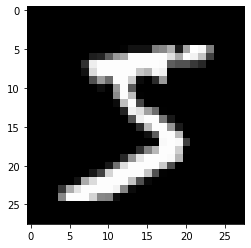

In [2]:
plt.imshow(dataset[0][0].squeeze(),cmap='gray')

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
model.train()
for epoch in range(30):  

    total_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        total_loss += loss.item()
    print('Epoch {} loss: {:.4f}'.format(epoch + 1, total_loss / len(dataloader)))

print('Finished Training')


Epoch 1 loss: 0.6648
Epoch 2 loss: 0.1836
Epoch 3 loss: 0.1143
Epoch 4 loss: 0.0846
Epoch 5 loss: 0.0699
Epoch 6 loss: 0.0601
Epoch 7 loss: 0.0527
Epoch 8 loss: 0.0474
Epoch 9 loss: 0.0427
Epoch 10 loss: 0.0397
Epoch 11 loss: 0.0360
Epoch 12 loss: 0.0335
Epoch 13 loss: 0.0307
Epoch 14 loss: 0.0286
Epoch 15 loss: 0.0264
Epoch 16 loss: 0.0247
Epoch 17 loss: 0.0233
Epoch 18 loss: 0.0215
Epoch 19 loss: 0.0201
Epoch 20 loss: 0.0189
Epoch 21 loss: 0.0175
Epoch 22 loss: 0.0171
Epoch 23 loss: 0.0158
Epoch 24 loss: 0.0148
Epoch 25 loss: 0.0141
Epoch 26 loss: 0.0133
Epoch 27 loss: 0.0117
Epoch 28 loss: 0.0115
Epoch 29 loss: 0.0103
Epoch 30 loss: 0.0099
Finished Training


In [5]:
test_data=np.loadtxt("test.csv",delimiter=",")
eval_data=np.loadtxt("train.csv",delimiter=",")

In [6]:

img_eval = torch.from_numpy((eval_data[:,1:]/255.).reshape(42000,28,28))
targets_eval = torch.from_numpy(eval_data[:,0])
img_test = torch.from_numpy((test_data/255.).reshape(28000,28,28))

# Create TensorDataset
dataset_eval = torch.utils.data.TensorDataset(img_eval, targets_eval)
dataset_test = torch.utils.data.TensorDataset(img_test)

# Create DataLoader
dataloader_eval = torch.utils.data.DataLoader(dataset_eval, batch_size=32)
dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=1)


In [7]:
model.eval()
model=model.double()
with torch.no_grad():
    total=0
    correct=0
    for i, data in enumerate(dataloader_eval, 0):
        inputs, labels = data
        outputs = model(inputs.unsqueeze(1))
        _,predicted = torch.max(outputs.data, 1)
        total+=labels.shape[0]
        correct+=(predicted == labels).sum().item()
    print('Accuracy for evaluation data is : {}%'.format(100*correct/total))

Accuracy for evaluation data is : 99.7%


In [8]:
model.eval()
model=model.double()
with torch.no_grad():
    preds=[]
    for i, data in enumerate(dataloader_test, 0):
        outputs = model(data[0].unsqueeze(1))
        _,predicted = torch.max(outputs.data, 1)
        preds.append(predicted.item())

In [9]:
import pandas as pd 
pd.DataFrame({'ImageId':1+np.arange(len(preds)),'Label':preds}).set_index('ImageId').to_csv("result.csv")